In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = '/content/drive/MyDrive/project/Face Mask Dataset/Train'
test = '/content/drive/MyDrive/project/Face Mask Dataset/Test'
val = '/content/drive/MyDrive/project/Face Mask Dataset/Validation'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import h5py

In [6]:
datagen1 = ImageDataGenerator(
        rescale=1.0/255,
        )

In [7]:
train_gen1 = datagen1.flow_from_directory(directory=train,target_size=(150,150),class_mode='categorical',batch_size=32)
test_gen1 = datagen1.flow_from_directory(directory=test,target_size=(150,150),class_mode='categorical',batch_size=32)
val_gen1 = datagen1.flow_from_directory(directory=val,target_size=(150,150),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [8]:
model1 = Sequential()
model1.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [9]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
h1 = model1.fit(
  train_gen1,
  validation_data=val_gen1,
  epochs=10
)

Epoch 1/10
313/313 [==============================] - 922s 3s/step - loss: 0.1544 - accuracy: 0.9404 - val_loss: 0.1294 - val_accuracy: 0.9488
Epoch 2/10
313/313 [==============================] - 43s 136ms/step - loss: 0.0560 - accuracy: 0.9811 - val_loss: 0.0432 - val_accuracy: 0.9962
Epoch 3/10
313/313 [==============================] - 43s 137ms/step - loss: 0.0351 - accuracy: 0.9873 - val_loss: 0.0739 - val_accuracy: 0.9787
Epoch 4/10
313/313 [==============================] - 43s 136ms/step - loss: 0.0298 - accuracy: 0.9888 - val_loss: 0.0374 - val_accuracy: 0.9850
Epoch 5/10
313/313 [==============================] - 43s 138ms/step - loss: 0.0204 - accuracy: 0.9926 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 6/10
313/313 [==============================] - 44s 142ms/step - loss: 0.0226 - accuracy: 0.9922 - val_loss: 0.0221 - val_accuracy: 0.9925
Epoch 7/10
313/313 [==============================] - 44s 139ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0493 - val_accu

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 flatten (Flatten)           (None, None)              0

In [12]:
datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
        )

In [19]:
train_gen = datagen.flow_from_directory(directory=train,target_size=(150,150),class_mode='categorical',batch_size=32, shuffle=True)
test_gen = datagen.flow_from_directory(directory=test,target_size=(150,150),class_mode='categorical',batch_size=32)
val_gen = datagen1.flow_from_directory(directory=val,target_size=(150,150),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
from keras.models import load_model

In [25]:
history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=10
)

Epoch 1/10
313/313 [==============================] - 102s 323ms/step - loss: 0.3368 - accuracy: 0.8791 - val_loss: 0.1166 - val_accuracy: 0.9638
Epoch 2/10
313/313 [==============================] - 101s 322ms/step - loss: 0.1943 - accuracy: 0.9280 - val_loss: 0.0884 - val_accuracy: 0.9712
Epoch 3/10
313/313 [==============================] - 101s 322ms/step - loss: 0.1759 - accuracy: 0.9355 - val_loss: 0.0910 - val_accuracy: 0.9700
Epoch 4/10
313/313 [==============================] - 102s 324ms/step - loss: 0.1618 - accuracy: 0.9409 - val_loss: 0.1197 - val_accuracy: 0.9625
Epoch 5/10
313/313 [==============================] - 102s 327ms/step - loss: 0.1527 - accuracy: 0.9458 - val_loss: 0.0864 - val_accuracy: 0.9737
Epoch 6/10
313/313 [==============================] - 102s 326ms/step - loss: 0.1517 - accuracy: 0.9424 - val_loss: 0.0874 - val_accuracy: 0.9712
Epoch 7/10
313/313 [==============================] - 102s 326ms/step - loss: 0.1436 - accuracy: 0.9502 - val_loss: 0.0682 -

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 flatten_1 (Flatten)         (None, None)             

In [ ]:
model.save('my_model.h5')

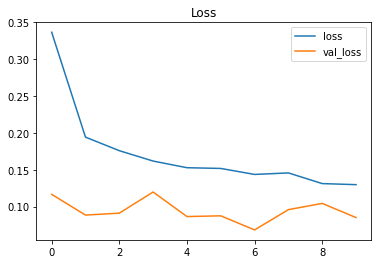

In [28]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

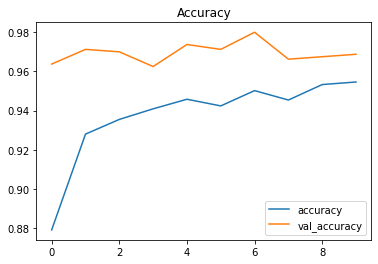

In [29]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [54]:
import os
import glob
import cv2

In [37]:
path = '/content/drive/MyDrive/project/Face Mask Dataset'

In [49]:
from google.colab import data_table
from vega_datasets import data

In [76]:
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": []
}

for where in os.listdir(path):
  for status in os.listdir(path+"/"+where):
    for image in glob.glob(path+"/"+where+"/"+status+"/"+"*.png"):
      dataset["image_path"].append(image)
      dataset["mask_status"].append(status)
      dataset["where"].append(where)

dataset = pd.DataFrame(dataset)

dataset

,image_path,mask_status,where
0,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Test
1,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Test
2,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Test
3,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Test
4,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Test
...,...,...,...
11787,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Train
11788,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Train
11789,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Train
11790,/content/drive/MyDrive/project/Face Mask Datas...,WithoutMask,Train


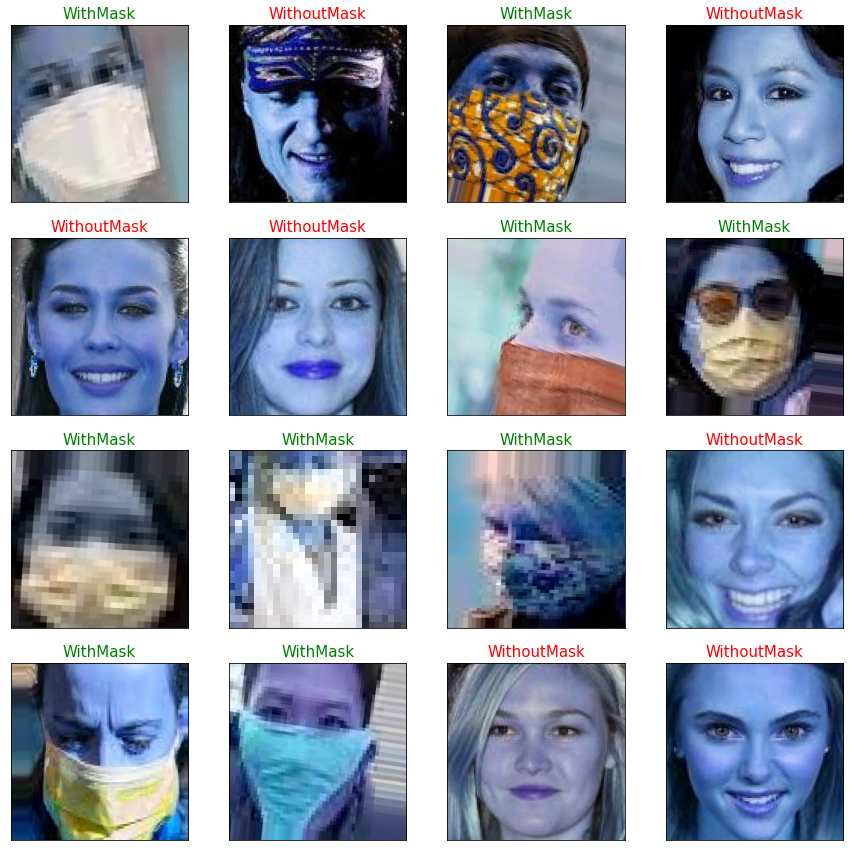

In [89]:
plt.figure(figsize = (15,15))
for i in range(16):
    random = np.random.randint(1,len(dataset))
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random, "mask_status"], size = 15, color = "green" if dataset.loc[random, "mask_status"] == 'WithMask' else "red")
    plt.xticks([])
    plt.yticks([])
    
plt.show()